In [8]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Juan Jose Bustamante Guiral

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



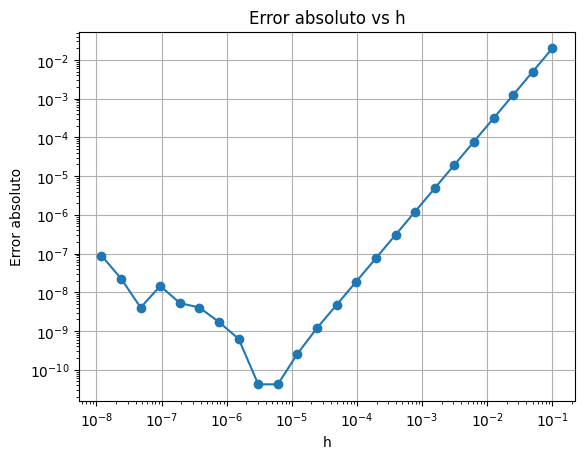

Derivada aproximada con h más pequeño: 9.887510687112808


In [9]:
def f(x):
    '''
    Función a la que queremos calcular la derivada
    '''
    return 3**x

def derivada(f, x, tol=1e-8):
    h = 0.1  # paso inicial
    errores = []
    h_valores = []
    valor_derivada = []


    derivada_exacta = 3**x * np.log(3)

    while h > tol:
        df = (f(x + h) - f(x - h)) / (2 * h)  # fórmula central
        error = abs(df - derivada_exacta)
        errores.append(error)
        h_valores.append(h)
        valor_derivada.append(df)
        h /= 2

    # Grafica del error en escala log
    plt.figure()
    plt.loglog(h_valores, errores, marker='o')
    plt.xlabel('h')
    plt.ylabel('Error absoluto')
    plt.title('Error absoluto vs h')
    plt.grid()
    plt.show()

    return valor_derivada, h_valores

derivadas_aprox, h_valores = derivada(f, 2)

print(f'Derivada aproximada con h más pequeño: {derivadas_aprox[-1]}')


## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



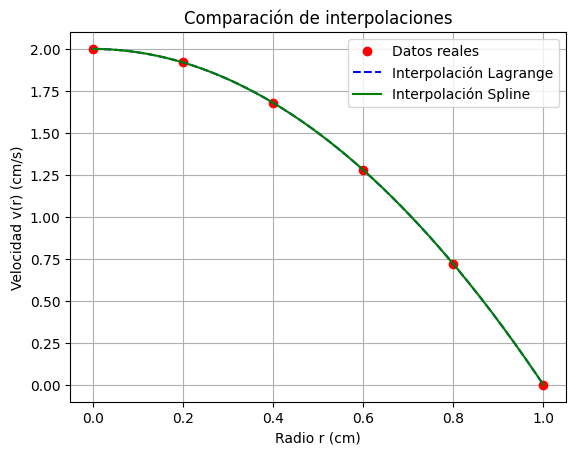

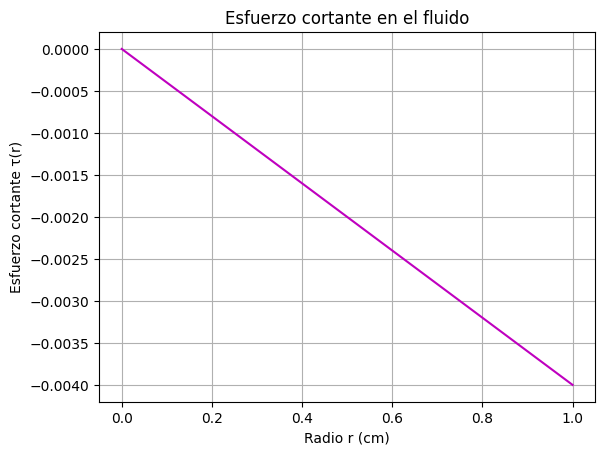

In [10]:
#Datos de r
r_datos = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v_datos = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])

# Interpolación de Lagrange
polinomio_lagrange = lagrange(r_datos, v_datos)

# Interpolación por spline cúbico
spline = CubicSpline(r_datos, v_datos)

r = np.linspace(0, 1, 200)

v_lagrange = polinomio_lagrange(r)
v_spline = spline(r)

# Grafica
plt.plot(r_datos, v_datos, 'ro', label='Datos reales')
plt.plot(r, v_lagrange, 'b--', label='Interpolación Lagrange')
plt.plot(r, v_spline, 'g-', label='Interpolación Spline')
plt.xlabel('Radio r (cm)')
plt.ylabel('Velocidad v(r) (cm/s)')
plt.title('Comparación de interpolaciones')
plt.legend()
plt.grid()
plt.show()

# h = 10^-4
r = np.linspace(0, 1, int(1/1e-4)+1)
v = spline(r)
dv_dr = np.gradient(v, 1e-4)  # derivada con paso h = 10^-4


mu = 0.001  # Pa·s
tau = mu * dv_dr

# Grafica
plt.plot(r, tau, 'm')
plt.xlabel('Radio r (cm)')
plt.ylabel('Esfuerzo cortante τ(r)')
plt.title('Esfuerzo cortante en el fluido')
plt.grid()
plt.show()


# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [11]:

def densidad(x, y, z):
    return x * y * z


# Paso 2: Límites de integración
# La región está dada por:
# x en [0, 1]
# y en [0, 1 - x]
# z en [0, 1 - x - y]

masa, error_masa = tplquad(densidad,0, 1,lambda x: 0, lambda x: 1 - x,lambda x, y: 0, lambda x, y: 1 - x - y)

print(f'Masa total del sólido: {masa} kg')


def integrando_Iz(x, y, z):
    return (x**2 + y**2) * x * y * z

Iz, error_Iz = tplquad(integrando_Iz,0, 1,lambda x: 0, lambda x: 1 - x,lambda x, y: 0, lambda x, y: 1 - x - y)

print(f'Momento de inercia respecto al eje z: I_z = {Iz}')

def integrando_Ix(x, y, z):
    return (y**2 + z**2) * x * y * z

Ix, error_Ix = tplquad(integrando_Ix,0, 1,lambda x: 0, lambda x: 1 - x,lambda x, y: 0, lambda x, y: 1 - x - y)

print(f'Momento de inercia respecto al eje x: I_x = {Ix}')


Masa total del sólido: 0.001388888888888889 kg
Momento de inercia respecto al eje z: I_z = 0.00029761904761904765
Momento de inercia respecto al eje x: I_x = 0.00029761904761904765
